<a href="https://colab.research.google.com/github/PriyankaJha2002/Brain-Stroke-Prediction-Kaggle-Challenge/blob/main/Major_project_B21EE052_B21EE049_B21EE080_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the necessary libraries

In [ ]:
import warnings
warnings.simplefilter(action='ignore')
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
df = pd.read_csv("brain_stroke.csv")
X = df.drop(columns=['stroke'])
y = df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
df.shape

(4981, 11)

Finds the number of null values in each column

In [ ]:
print(df.isna().sum())

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


Provides basic statistical analysis of all numberical type attributes count mean, standaard deviation, minimum values, all quartiles, maximum values

In [ ]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


**Rectifying the imbalance in the target variable by oversampling using SMOTE**

<Axes: xlabel='stroke', ylabel='Count'>

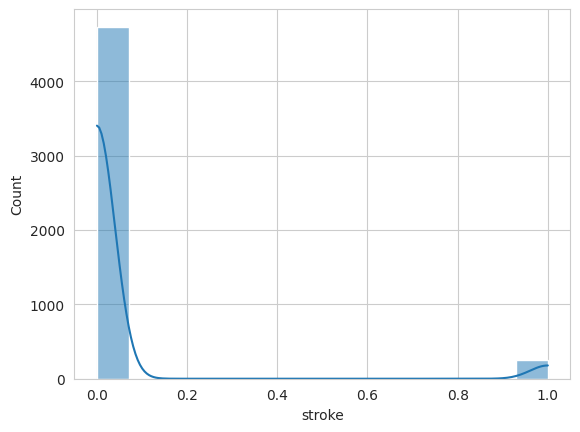

In [ ]:
df['stroke'].value_counts()
sns.histplot(df['stroke'],kde = True)

In [ ]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from imblearn.over_sampling import SMOTE
# Use SMOTE to oversample the minority class (stroke == 1)
X = df.drop(columns=['stroke'])
y = df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

Provides the data type of all attributes, number of not null values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [ ]:
date= list(df.select_dtypes(include=['datetime64[ns]']))
cats= list(df.select_dtypes(include=['object','bool']) )
nums= list(df.select_dtypes(include=['int64','float64']))
print(date)
print(cats)
print(nums)

[]
['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']


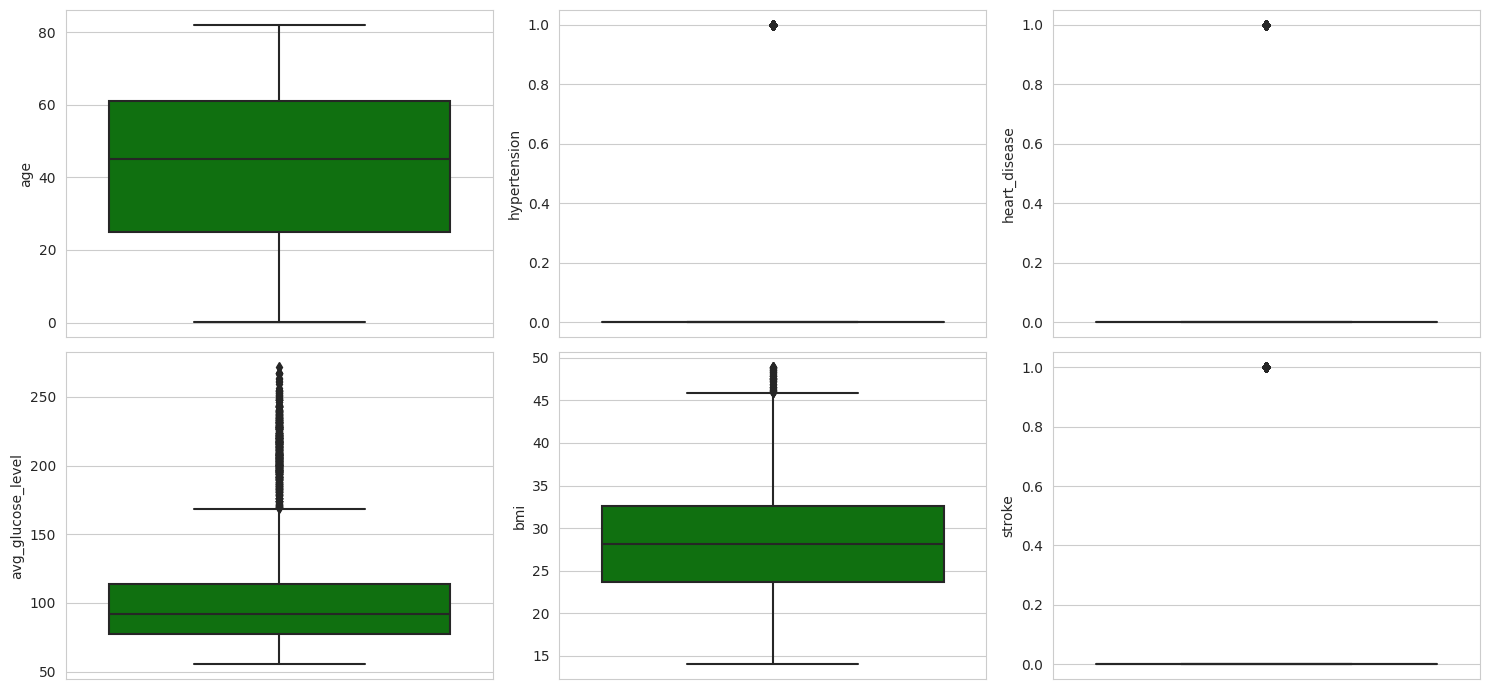

In [ ]:
nums= list(df.select_dtypes(include=['int64','float64']))
import seaborn as sns
plt.figure(figsize=(15, 7))
for i in range(0, len(nums)):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[nums[i]],color='green',orient='v')
    plt.tight_layout()


Applying one-hot encoding to the categorical columns

In [ ]:
from sklearn.preprocessing import LabelEncoder
cols_to_encode = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]
le = LabelEncoder()
for col in cols_to_encode:
    df[col] = le.fit_transform(df[col])
print(df.head())


   gender   age  hypertension  heart_disease  ever_married  work_type  \
0       1  67.0             0              1             1          1   
1       1  80.0             0              1             1          1   
2       0  49.0             0              0             1          1   
3       0  79.0             1              0             1          2   
4       1  81.0             0              0             1          1   

   Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0               1             228.69  36.6               1       1  
1               0             105.92  32.5               2       1  
2               1             171.23  34.4               3       1  
3               0             174.12  24.0               2       1  
4               1             186.21  29.0               1       1  


Handling the continuous columns as well

In [ ]:
# replace the age values with 0/1/2/3
for row in df.index:
    if df.loc[row, 'age'] < 20:
        df.loc[row, 'age'] = 0
    elif df.loc[row, 'age'] < 30:
        df.loc[row, 'age'] = 1
    elif df.loc[row, 'age'] < 40:
        df.loc[row, 'age'] = 2
    elif df.loc[row, 'age'] < 50:
        df.loc[row, 'age'] = 3
    elif df.loc[row, 'age'] < 60:
        df.loc[row, 'age'] = 4
    elif df.loc[row, 'age'] < 70:
        df.loc[row, 'age'] = 5
    elif df.loc[row, 'age'] < 80:
        df.loc[row, 'age'] = 5
    else:
        df.loc[row, 'age'] = 6

# replace the avg_glucose_level values with 0/1/2/3
for row in df.index:
    if df.loc[row, 'avg_glucose_level'] < 100:
        df.loc[row, 'avg_glucose_level'] = 0
    elif df.loc[row, 'avg_glucose_level'] < 125:
        df.loc[row, 'avg_glucose_level'] = 1
    elif df.loc[row, 'avg_glucose_level'] < 150:
        df.loc[row, 'avg_glucose_level'] = 2
    elif df.loc[row, 'avg_glucose_level'] < 175:
        df.loc[row, 'avg_glucose_level'] = 3
    elif df.loc[row, 'avg_glucose_level'] < 200:
        df.loc[row, 'avg_glucose_level'] = 4
    elif df.loc[row, 'avg_glucose_level'] < 225:
        df.loc[row, 'avg_glucose_level'] = 5
    else:
        df.loc[row, 'avg_glucose_level'] = 6

# replace the bmi values with 0/1/2/3
for row in df.index:
    if df.loc[row, 'bmi'] < 18.5:
        df.loc[row, 'bmi'] = 0
    elif df.loc[row, 'bmi'] < 25:
        df.loc[row, 'bmi'] = 1
    elif df.loc[row, 'bmi'] < 30:
        df.loc[row, 'bmi'] = 2
    elif df.loc[row, 'bmi'] < 35:
        df.loc[row, 'bmi'] = 3
    elif df.loc[row, 'bmi'] < 40:
        df.loc[row, 'bmi'] = 4
    else:
        df.loc[row, 'bmi'] = 5
df


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,5.0,0,1,1,1,1,6.0,4.0,1,1
1,1,6.0,0,1,1,1,0,1.0,3.0,2,1
2,0,3.0,0,0,1,1,1,3.0,3.0,3,1
3,0,5.0,1,0,1,2,0,3.0,1.0,2,1
4,1,6.0,0,0,1,1,1,4.0,2.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,1,3.0,0,0,0,1,0,0.0,2.0,1,0
4977,1,3.0,0,0,1,1,1,4.0,3.0,3,0
4978,0,3.0,1,0,1,0,0,0.0,3.0,3,0
4979,1,3.0,0,0,1,1,0,0.0,3.0,3,0


In [ ]:
df.corr().style.background_gradient(cmap='coolwarm')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,-0.018497,0.021485,0.086476,-0.028971,0.065784,-0.004301,0.051951,0.000792,-0.062666,0.008870
age,-0.018497,1.000000,0.276094,0.254949,0.688251,-0.385984,0.017101,0.244990,0.348261,0.248389,0.229969
hypertension,0.021485,0.276094,1.000000,0.111974,0.164534,-0.061618,-0.004755,0.175901,0.155732,0.110045,0.131965
heart_disease,0.086476,0.254949,0.111974,1.000000,0.114765,-0.036943,0.002125,0.171875,0.060262,0.048093,0.134610
ever_married,-0.028971,0.688251,0.164534,0.114765,1.000000,-0.406439,0.008191,0.156649,0.352149,0.262384,0.108398
work_type,0.065784,-0.385984,-0.061618,-0.036943,-0.406439,1.000000,-0.003524,-0.062483,-0.356067,-0.356738,-0.041835
Residence_type,-0.004301,0.017101,-0.004755,0.002125,0.008191,-0.003524,1.000000,0.003432,0.010627,0.010209,0.016494
avg_glucose_level,0.051951,0.244990,0.175901,0.171875,0.156649,-0.062483,0.003432,1.000000,0.192548,0.069180,0.138038
bmi,0.000792,0.348261,0.155732,0.060262,0.352149,-0.356067,0.010627,0.192548,1.000000,0.228909,0.052850
smoking_status,-0.062666,0.248389,0.110045,0.048093,0.262384,-0.356738,0.010209,0.069180,0.228909,1.000000,0.027463


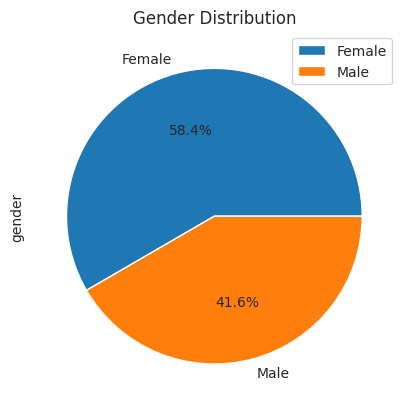

In [ ]:
labels = df['gender'].replace({0: 'Female', 1: 'Male'}).value_counts().index.tolist()

# Plot the pie chart with labels
ax = df['gender'].replace({0: 'Female', 1: 'Male'}).value_counts().plot(kind="pie", autopct='%1.1f%%')
ax.legend(labels, loc='upper right')
plt.title('Gender Distribution')
plt.show()

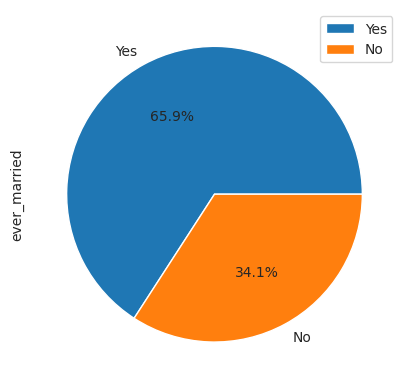

In [ ]:
labels = df['ever_married'].replace({0: 'Yes', 1: 'No'}).value_counts().index.tolist()

# Plot the pie chart with labels
ax = df['ever_married'].replace({0: 'Yes', 1: 'No'}).value_counts().plot(kind="pie", autopct='%1.1f%%')
ax.legend(labels, loc='upper right')
plt.show()

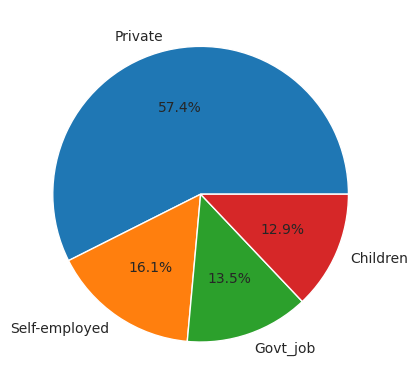

In [ ]:
counts = df['work_type'].value_counts()
labels = ['Private', 'Self-employed', 'Govt_job', 'Children']

plt.pie(counts, labels=labels,autopct='%1.1f%%')
plt.show()

Text(0.5, 1.0, 'Smoking status Distribution')

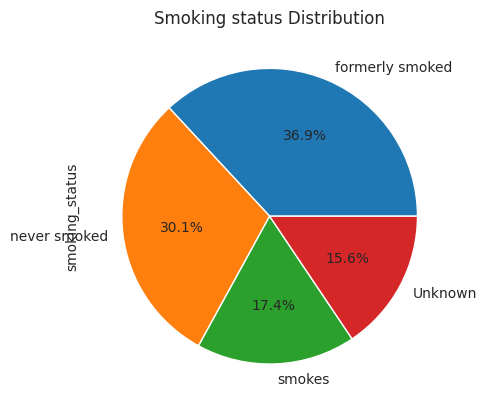

In [ ]:
labels = ['formerly smoked', 'never smoked', 'smokes', 'Unknown']
df['smoking_status'].value_counts().plot(kind="pie", labels=labels,autopct='%1.1f%%')
plt.title('Smoking status Distribution')

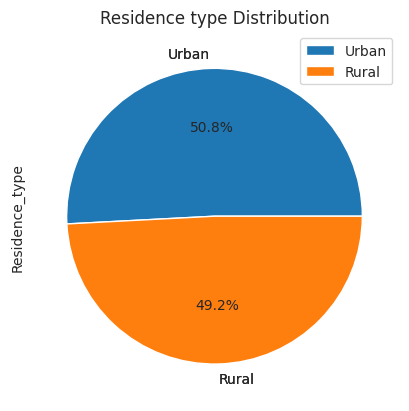

In [ ]:
df['Residence_type'].value_counts().plot(kind="pie")
labels = df['Residence_type'].replace({0: 'rural', 1: 'urban'}).value_counts().index.tolist()

# Plot the pie chart with labels
ax = df['Residence_type'].replace({0: 'rural', 1: 'urban'}).value_counts().plot(kind="pie", autopct='%1.1f%%')
ax.legend(labels, loc='upper right')
plt.title('Residence type Distribution')
plt.show()

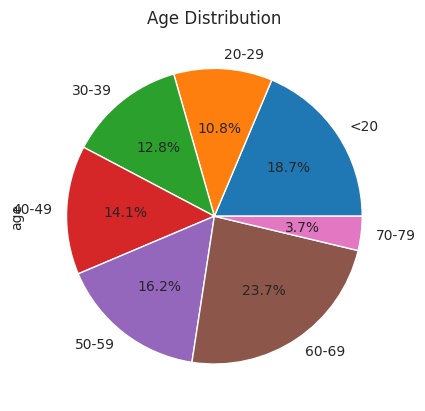

In [ ]:
age_labels = ['<20', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '>80']
df['age'].value_counts().sort_index().plot(kind='pie', labels=age_labels, autopct='%1.1f%%')
plt.title('Age Distribution')
plt.show()

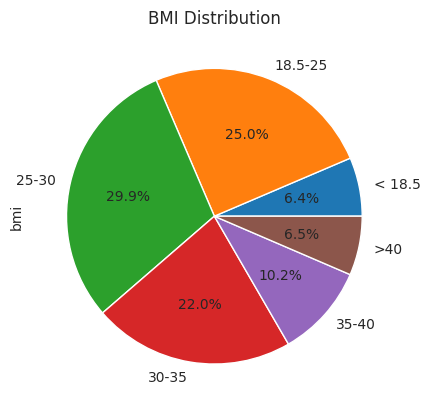

In [ ]:
bmi_labels = ['< 18.5', '18.5-25', '25-30', '30-35', '35-40', '>40']
df['bmi'].value_counts().sort_index().plot(kind='pie', labels=bmi_labels, autopct='%1.1f%%')
plt.title('BMI Distribution')
plt.show()

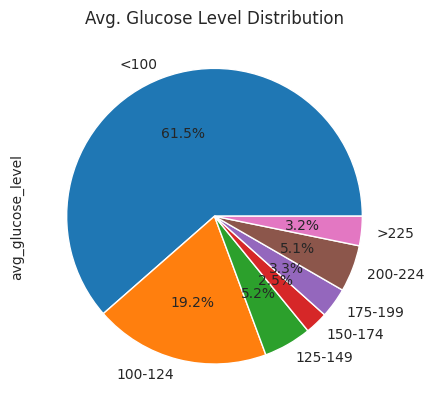

In [ ]:
glucose_labels = ['<100', '100-124', '125-149', '150-174', '175-199', '200-224', '>225']
df['avg_glucose_level'].value_counts().sort_index().plot(kind='pie', labels=glucose_labels, autopct='%1.1f%%')
plt.title('Avg. Glucose Level Distribution')
plt.show()

**Handling outliers**

In [ ]:
outlier = ['avg_glucose_level','bmi']
skewed = ['avg_glucose_level','bmi']

In [ ]:
from scipy import stats
print(f'Length of the data before filtering outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in outlier:
    zscore = abs(stats.zscore(df[col]))
    filtered_entries = (zscore < 3) & filtered_entries

df = df[filtered_entries]

print(f'Length of the data after filtering outlier: {len(df)}')

Length of the data before filtering outlier: 4981
Length of the data after filtering outlier: 4821


**Classifying using a neural network**

In [ ]:
import warnings
warnings.simplefilter(action='ignore')
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = df.drop(columns=['stroke'])
y = df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
model.evaluate(X_test, y_test)
accuracy = model.evaluate(X_test, y_test)[1]
print(f"Accuracy of the neural network on the testing data: {accuracy*100:.2f}%")



Epoch 1/50
121/121 [==============================] - 2s 7ms/step - loss: 0.2529 - accuracy: 0.9380 - val_loss: 0.1941 - val_accuracy: 0.9430
Epoch 2/50
121/121 [==============================] - 0s 4ms/step - loss: 0.1577 - accuracy: 0.9557 - val_loss: 0.1836 - val_accuracy: 0.9430
Epoch 3/50
121/121 [==============================] - 0s 4ms/step - loss: 0.1525 - accuracy: 0.9557 - val_loss: 0.1837 - val_accuracy: 0.9430
Epoch 4/50
121/121 [==============================] - 0s 4ms/step - loss: 0.1495 - accuracy: 0.9557 - val_loss: 0.1833 - val_accuracy: 0.9430
Epoch 5/50
121/121 [==============================] - 0s 2ms/step - loss: 0.1479 - accuracy: 0.9557 - val_loss: 0.1822 - val_accuracy: 0.9430
Epoch 6/50
121/121 [==============================] - 0s 3ms/step - loss: 0.1461 - accuracy: 0.9557 - val_loss: 0.1817 - val_accuracy: 0.9430
Epoch 7/50
121/121 [==============================] - 0s 3ms/step - loss: 0.1456 - accuracy: 0.9557 - val_loss: 0.1823 - val_accuracy: 0.9430
Epoch 

**The SVM Classifier with hyperparameter tuning**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
from sklearn import svm
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.01,0.1,1,10], 'gamma': [0.01,0.1], 'kernel': ['linear', 'poly', 'rbf','sigmoid']}
svm_model = svm.SVC()
grid_search = GridSearchCV(svm_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters: ", grid_search.best_params_)
best_svm_model = svm.SVC(C=grid_search.best_params_['C'], gamma=grid_search.best_params_['gamma'], kernel=grid_search.best_params_['kernel'])
best_svm_model.fit(X_train, y_train)



Best hyperparameters:  {'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}


SVC(C=0.1, gamma=0.1, kernel='poly')

**Decision tree and Hyperparameter tuning**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
clf = DecisionTreeClassifier()
params = {'max_depth': [3, 5, 7], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'max_features': [None, 'sqrt', 'log2']}
grid_search = GridSearchCV(clf, param_grid=params, cv=5, scoring='f1_macro')
grid_search.fit(X_train, y_train)
print('Best hyperparameters:', grid_search.best_params_)
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)

Best hyperparameters: {'max_depth': 7, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.938860103626943
Precision: 0.16666666666666666
Recall: 0.01818181818181818
F1-score: 0.032786885245901634


**Logistic Regression and Hyperparameter tuning**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
clf = LogisticRegression()
params = {'C': [0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}
grid_search = GridSearchCV(clf, param_grid=params, cv=5, scoring='f1_macro')
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print('Accuracy:', accuracy)

print('Best hyperparameters:', grid_search.best_params_)

Accuracy: 0.9430051813471503
Best hyperparameters: {'C': 0.1, 'penalty': 'l2'}


**KNN Classifier and optimal value of number of neighbours**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
k_values = list(range(1, 31))
hyperparameters = {'n_neighbors': k_values}
grid_search = GridSearchCV(knn, hyperparameters, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best value of K: {}".format(grid_search.best_params_['n_neighbors']))
print("Accuracy on validation set: {:.2f}".format(grid_search.best_score_))


Best value of K: 12
Accuracy on validation set: 0.96


**Kmeans classifier, find the optimal value of K**

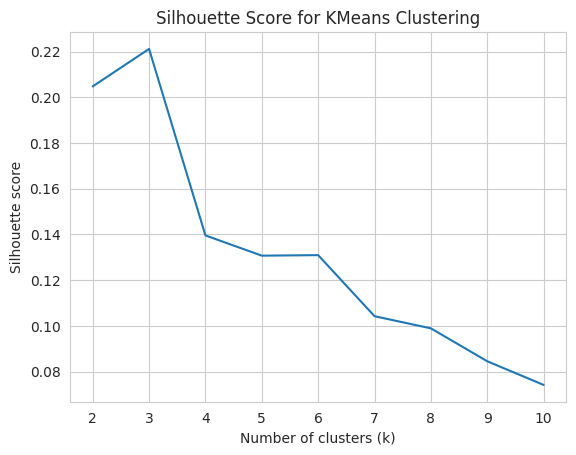

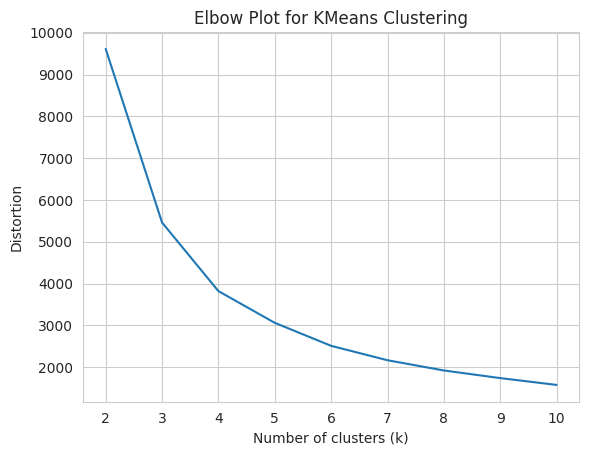

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
import warnings
warnings.simplefilter(action='ignore')
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
silhouette_scores = []
k_values = range(2, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)
plt.plot(k_values, silhouette_scores)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette score')
plt.title('Silhouette Score for KMeans Clustering')
plt.show()

distortions = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    distortion = kmeans.inertia_
    distortions.append(distortion)

plt.plot(k_values, distortions)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Distortion')
plt.title('Elbow Plot for KMeans Clustering')
plt.show()


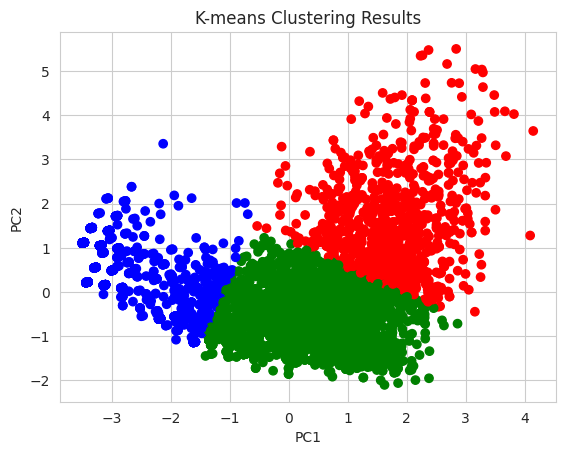

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
colors = np.array(['blue', 'green', 'red'])
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca)
labels = kmeans.labels_
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors[labels])
plt.title('K-means Clustering Results')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


**Using a bagging classifier to classify using Logistic regression, Decision Tree, SVM, Naive Bayes, KNN and Kmeans using the optimal hyerparameters**

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
svm = SVC(kernel='poly', C=0.1, gamma=0.1, random_state=42)
logreg = LogisticRegression(C=0.1, penalty='l2', random_state=42)
nb = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=12)
kmeans = KMeans(n_clusters=2, random_state=42)
dt = DecisionTreeClassifier(max_depth=7, max_features=None, min_samples_leaf=1, min_samples_split=2, random_state=42)

bagging = BaggingClassifier(base_estimator=svm, n_estimators=10, random_state=42)
bagging2 = BaggingClassifier(base_estimator=logreg, n_estimators=10, random_state=42)
bagging3 = BaggingClassifier(base_estimator=nb, n_estimators=10, random_state=42)
bagging4 = BaggingClassifier(base_estimator=knn, n_estimators=10, random_state=42)
bagging5 = BaggingClassifier(base_estimator=kmeans, n_estimators=10, random_state=42)
bagging6 = BaggingClassifier(base_estimator=dt, n_estimators=10, random_state=42)

bagging.fit(X_train, y_train)
bagging2.fit(X_train, y_train)
bagging3.fit(X_train, y_train)
bagging4.fit(X_train, y_train)
bagging5.fit(X_train, y_train)
bagging6.fit(X_train, y_train)

accuracy = bagging.score(X_test, y_test)
print(f"Accuracy of the bagging classifier with SVM base estimator on the testing data: {accuracy*100:.2f}%")

accuracy2 = bagging2.score(X_test, y_test)
print(f"Accuracy of the bagging classifier with Logistic Regression base estimator on the testing data: {accuracy2*100:.2f}%")

accuracy3 = bagging3.score(X_test, y_test)
print(f"Accuracy of the bagging classifier with Naive Bayes base estimator on the testing data: {accuracy3*100:.2f}%")

accuracy4 = bagging4.score(X_test, y_test)
print(f"Accuracy of the bagging classifier with KNN base estimator on the testing data: {accuracy4*100:.2f}%")

accuracy5 = bagging5.score(X_test, y_test)
print(f"Accuracy of the bagging classifier with KMeans base estimator on the testing data: {accuracy5*100:.2f}%")

accuracy6 = bagging6.score(X_test, y_test)
print(f"Accuracy of the bagging classifier with Decision Tree base estimator on the testing data: {accuracy6*100:.2f}%")


Accuracy of the bagging classifier with SVM base estimator on the testing data: 94.30%
Accuracy of the bagging classifier with Logistic Regression base estimator on the testing data: 94.30%
Accuracy of the bagging classifier with Naive Bayes base estimator on the testing data: 86.01%
Accuracy of the bagging classifier with KNN base estimator on the testing data: 94.30%
Accuracy of the bagging classifier with KMeans base estimator on the testing data: 65.39%
Accuracy of the bagging classifier with Decision Tree base estimator on the testing data: 94.20%


**Plot the accuracy of the bagging classifier**

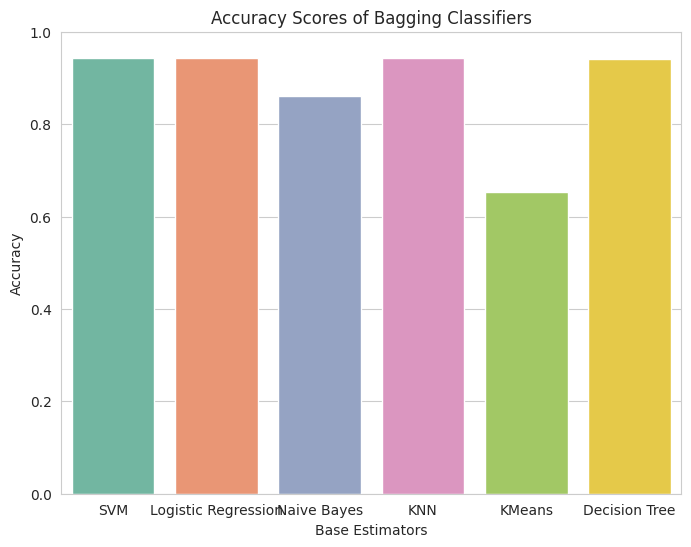

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
accuracy_scores = [accuracy, accuracy2, accuracy3, accuracy4, accuracy5, accuracy6]
labels = ['SVM', 'Logistic Regression', 'Naive Bayes', 'KNN', 'KMeans', 'Decision Tree']
sns.set_style('whitegrid')
plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=accuracy_scores, palette='Set2')
plt.title('Accuracy Scores of Bagging Classifiers')
plt.xlabel('Base Estimators')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.show()


**Calculating the hinge and log loss for the SVM and Logistic reression respectively**

In [ ]:
from sklearn.metrics import hinge_loss, log_loss
svm = SVC(kernel='poly', C=0.1, gamma=0.1, random_state=42)
logreg = LogisticRegression(C=0.1, penalty='l2', random_state=42)
svm.fit(X_train, y_train)
svm_loss = hinge_loss(y_test, svm.predict(X_test))
print(f"Hinge loss for SVM model: {svm_loss:.4f}")
logreg.fit(X_train, y_train)
logreg_loss = log_loss(y_test, logreg.predict_proba(X_test))
print(f"Logistic loss for logistic regression model: {logreg_loss:.4f}")


Hinge loss for SVM model: 1.0000
Logistic loss for logistic regression model: 0.1801


**Using a boosting classifiers i.e., AdaBoostClassifier, XGBoostClassifier, and LightGBM**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)
ada_accuracy = ada.score(X_test, y_test)
print(f"Accuracy of AdaBoost classifier: {ada_accuracy*100:.2f}%")
xgb = XGBClassifier(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)
xgb_accuracy = xgb.score(X_test, y_test)
print(f"Accuracy of XGBoost classifier: {xgb_accuracy*100:.2f}%")
lgb = LGBMClassifier(n_estimators=100, random_state=42)
lgb.fit(X_train, y_train)
lgb_accuracy = lgb.score(X_test, y_test)
print(f"Accuracy of LightGBM classifier: {lgb_accuracy*100:.2f}%")


Accuracy of AdaBoost classifier: 94.30%
Accuracy of XGBoost classifier: 93.58%
Accuracy of LightGBM classifier: 93.99%


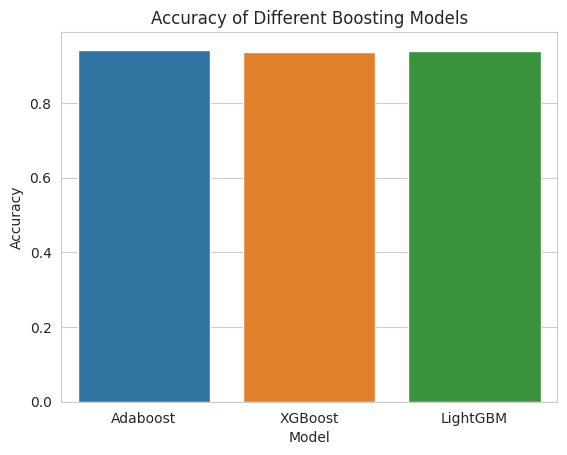

In [ ]:
models1 = {'Adaboost': ada_accuracy, 'XGBoost': xgb_accuracy, 'LightGBM': lgb_accuracy}
sns.barplot(x=list(models1.keys()), y=list(models1.values()))
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Boosting Models')
plt.show()

**Using a Random Forest classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Random Forest Classifier: {accuracy*100:.2f}%")


Accuracy of Random Forest Classifier: 94.30%


In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
import time
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Adaboost": AdaBoostClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
}
for name, model in models.items():
    start_time = time.time()
    model.fit(X, y)
    elapsed_time = time.time() - start_time
    accuracy = model.score(X, y)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Model Complexity: {'High' if name in ['Random Forest', 'Adaboost'] else 'Low'}")
    print(f"Interpretability: {'Low' if name == 'Random Forest' else 'High'}")
    print(f"Robustness: {'Low' if name == 'Adaboost' else 'High'}")
    print(f"Speed: {'Fast' if elapsed_time < 1 else 'Slow'}")
    print("--------------------")


Model: Random Forest
Accuracy: 0.9828
Model Complexity: High
Interpretability: Low
Robustness: High
Speed: Fast
--------------------
Model: Adaboost
Accuracy: 0.9531
Model Complexity: High
Interpretability: High
Robustness: Low
Speed: Fast
--------------------
Model: Logistic Regression
Accuracy: 0.9529
Model Complexity: Low
Interpretability: High
Robustness: High
Speed: Fast
--------------------


**Using the unsupervised learning models, i.e., KMeans, DBSCAN and Hierarchial Clustering**

In [ ]:
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
data=df
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
scores = []
for n_clusters in range(2, 11):
    model = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = model.fit_predict(data_pca)
    silhouette_avg = silhouette_score(data_pca, cluster_labels)
    scores.append(silhouette_avg)

best_n_clusters_hierarchical = np.argmax(scores) + 2
scores = []
for n_clusters in range(2, 11):
    model = KMeans(n_clusters=n_clusters)
    cluster_labels = model.fit_predict(data_pca)
    silhouette_avg = silhouette_score(data_pca, cluster_labels)
    scores.append(silhouette_avg)

best_n_clusters_kmeans = np.argmax(scores) + 2
scores = []
for eps in np.arange(0.1, 1.0, 0.1):
    for min_samples in range(2, 11):
        model = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = model.fit_predict(data_pca)
        if len(set(cluster_labels)) > 1:
            silhouette_avg = silhouette_score(data_pca, cluster_labels)
            scores.append(silhouette_avg)

best_hyperparameters_dbscan = max(scores)



In [ ]:
hierarchical = AgglomerativeClustering(n_clusters=best_n_clusters_hierarchical)
kmeans = KMeans(n_clusters=best_n_clusters_kmeans)
dbscan = DBSCAN(eps=best_hyperparameters_dbscan)

hierarchical_labels = hierarchical.fit_predict(data_pca)
kmeans_labels = kmeans.fit_predict(data_pca)
dbscan_labels = dbscan.fit_predict(data_pca)

hierarchical_score = silhouette_score(data_pca, hierarchical_labels)
kmeans_score = silhouette_score(data_pca, kmeans_labels)
dbscan_score = silhouette_score(data_pca, dbscan_labels)

print(f'Hierarchical clustering silhouette score: {hierarchical_score:.2f}')
print(f'K-means silhouette score: {kmeans_score:.2f}')
print(f'DBSCAN silhouette score: {dbscan_score:.2f}')


Hierarchical clustering silhouette score: 0.47
K-means silhouette score: 0.51
DBSCAN silhouette score: 0.58


**Comparing the classification metrics of KNN, Random forest, Adaboost and Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
lr = LogisticRegression()
rfc = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
abc = AdaBoostClassifier(n_estimators=100, random_state=42)
lr.fit(X_train, y_train)
rfc.fit(X_train, y_train)
knn.fit(X_train, y_train)
abc.fit(X_train, y_train)
models = [('Logistic Regression', lr), ('Random Forest', rfc), ('KNN', knn), ('AdaBoost', abc)]
for name, model in models:
    y_pred = model.predict(X_test)
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.98      0.72      0.83       943
           1       0.12      0.69      0.21        54

    accuracy                           0.72       997
   macro avg       0.55      0.70      0.52       997
weighted avg       0.93      0.72      0.79       997

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.97      0.71      0.82       943
           1       0.12      0.67      0.20        54

    accuracy                           0.71       997
   macro avg       0.55      0.69      0.51       997
weighted avg       0.93      0.71      0.79       997

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.96      0.86      0.90       943
           1       0.11      0.30      0.16        54

    accuracy                           0.83       997
   macro 

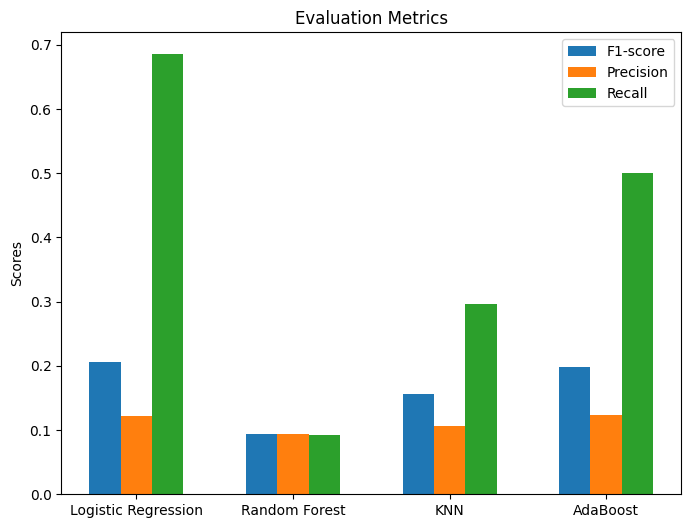

In [ ]:
from sklearn.metrics import classification_report
f1_scores = []
precisions = []
recalls = []

classifiers = [LogisticRegression(), RandomForestClassifier(), KNeighborsClassifier(), AdaBoostClassifier()]
for clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    f1_scores.append(report['1']['f1-score'])
    precisions.append(report['1']['precision'])
    recalls.append(report['1']['recall'])

# plot the evaluation metrics
import matplotlib.pyplot as plt
import numpy as np

labels = ['Logistic Regression', 'Random Forest', 'KNN', 'AdaBoost']
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(x - width, f1_scores, width, label='F1-score')
rects2 = ax.bar(x, precisions, width, label='Precision')
rects3 = ax.bar(x + width, recalls, width, label='Recall')

ax.set_ylabel('Scores')
ax.set_title('Evaluation Metrics')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

Cross-validation scores for Logistic Regression: [0.74353877 0.74552684 0.74850895 0.78031809 0.75248509]
Cross-validation scores for Random Forest: [0.76043738 0.7693837  0.75447316 0.79920477 0.76838966]
Cross-validation scores for KNN: [0.54870775 0.56361829 0.56361829 0.57952286 0.5666004 ]
Cross-validation scores for AdaBoost: [0.73856859 0.74552684 0.76143141 0.78827038 0.76540755]


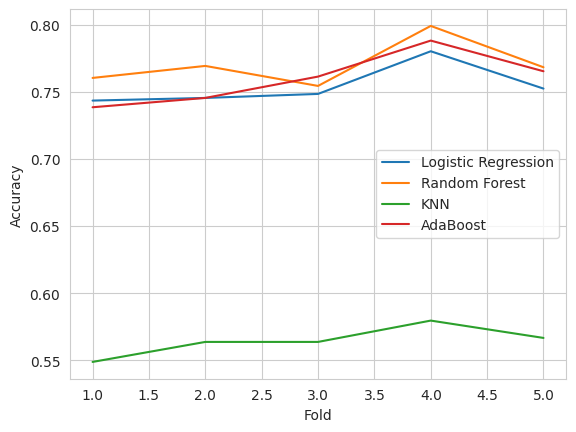

In [ ]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

lr = LogisticRegression()
rfc = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
abc = AdaBoostClassifier(n_estimators=100, random_state=42)

models = [('Logistic Regression', lr), ('Random Forest', rfc), ('KNN', knn), ('AdaBoost', abc)]

for name, model in models:
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"Cross-validation scores for {name}: {scores}")
    plt.plot(range(1, 6), scores, label=name)

plt.legend()
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.show()


**Before reinforcement learning:**

In [ ]:
import warnings
warnings.simplefilter(action='ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.cluster import DBSCAN
from scipy import stats
df = pd.read_csv("brain_stroke.csv")
cols_to_encode = ["gender", "ever_married", "work_type", "Residence_type", "smoking_status"]
le = LabelEncoder()
for col in cols_to_encode:
    df[col] = le.fit_transform(df[col])
for col in ['age', 'avg_glucose_level', 'bmi']:
    df[col] = pd.cut(df[col], bins=3, labels=[0, 1, 2])
X = df.drop(columns=['stroke'])
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)
outliers = np.where(dbscan.labels_ == -1)[0]
df = df.drop(outliers)
X = df.drop(columns=['stroke'])
y = df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.81      0.88       624
           1       0.05      0.23      0.08        26

    accuracy                           0.79       650
   macro avg       0.51      0.52      0.48       650
weighted avg       0.93      0.79      0.85       650



**After reinforcement learning:**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.ensemble import RandomForestClassifier
def get_reward(y_true, y_pred):
    accuracy = np.mean(y_true == y_pred)
    if accuracy >= 0.9:
        return 10
    elif accuracy >= 0.8:
        return 5
    elif accuracy >= 0.7:
        return 1
    else:
        return 0
dbscan = DBSCAN(eps=0.5, min_samples=5)
rf = RandomForestClassifier(n_estimators=100)
for episode in range(10):
    dbscan.fit(X)
    labels = dbscan.labels_
    rf.fit(X[labels != -1], y[labels != -1])
    results = rf.predict(X)
    reward = get_reward(y, results)
    if reward == 0:
        dbscan.eps *= 0.9
        dbscan.min_samples = max(1, dbscan.min_samples + 1)
    elif reward == 1:
        dbscan.eps *= 1.1
        dbscan.min_samples = max(1, dbscan.min_samples - 1)
    elif reward == 5:
        dbscan.eps *= 1.2
        dbscan.min_samples = max(1, dbscan.min_samples - 2)
    elif reward == 10:
        dbscan.eps *= 0.8
        dbscan.min_samples = max(1, dbscan.min_samples + 3)
    print(f"Episode {episode+1}: eps = {dbscan.eps}, min_samples = {dbscan.min_samples}")
from sklearn.metrics import classification_report
report = classification_report(y, results, zero_division=0)
print("Classification Report:\n", report)




Episode 1: eps = 0.4, min_samples = 8
Episode 2: eps = 0.32000000000000006, min_samples = 11
Episode 3: eps = 0.25600000000000006, min_samples = 14
Episode 4: eps = 0.20480000000000007, min_samples = 17
Episode 5: eps = 0.16384000000000007, min_samples = 20
Episode 6: eps = 0.13107200000000005, min_samples = 23
Episode 7: eps = 0.10485760000000005, min_samples = 26
Episode 8: eps = 0.08388608000000004, min_samples = 29
Episode 9: eps = 0.06710886400000003, min_samples = 32
Episode 10: eps = 0.05368709120000003, min_samples = 35
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      3139
           1       0.00      0.00      0.00       111

    accuracy                           0.97      3250
   macro avg       0.48      0.50      0.49      3250
weighted avg       0.93      0.97      0.95      3250

